In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = (df['cholesterol'] >1 ).astype(int)

df['gluc'] = (df['gluc'] > 1).astype(int)


c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


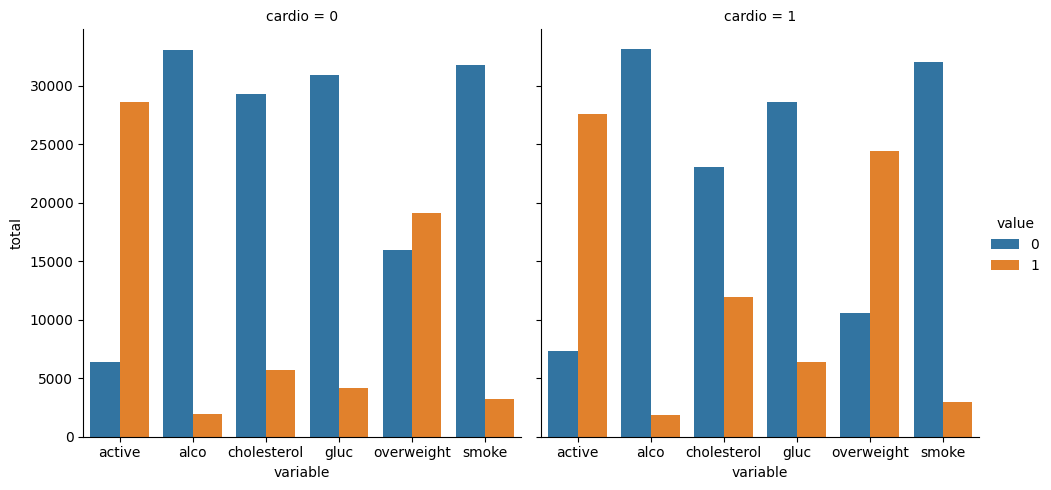

In [26]:
    df_cat = pd.melt(df,value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat =pd.melt(df,id_vars='cardio',value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    

    # Draw the catplot with 'sns.catplot()'

sns.catplot(data=df_cat, x='variable', hue='value', col='cardio', kind='count', order=sorted(df_cat['variable'].unique())).set_axis_labels("variable", "total")
    plt.ylabel("total")
    plt.show()
    # Get the figure for the output

In [23]:
    df_cat =pd.melt(df,id_vars='cardio',value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat.value_counts()

cardio  variable     value
1       alco         0        33156
0       alco         0        33080
1       smoke        0        32050
0       smoke        0        31781
        gluc         0        30894
        cholesterol  0        29330
        active       1        28643
1       gluc         0        28585
        active       1        27618
        overweight   1        24440
        cholesterol  0        23055
0       overweight   1        19106
                     0        15915
1       cholesterol  1        11924
        overweight   0        10539
        active       0         7361
        gluc         1         6394
0       active       0         6378
        cholesterol  1         5691
        gluc         1         4127
        smoke        1         3240
1       smoke        1         2929
0       alco         1         1941
1       alco         1         1823
Name: count, dtype: int64

In [5]:
df_cleaned = df[(df['ap_lo'] <= df['ap_hi']) &  # Presión diastólica menor o igual que la sistólica
                (df['height'] >= df['height'].quantile(0.025)) &  # Altura mayor o igual que el percentil 2.5
                (df['height'] <= df['height'].quantile(0.975)) &  # Altura menor o igual que el percentil 97.5
                (df['weight'] >= df['weight'].quantile(0.025)) &  # Peso mayor o igual que el percentil 2.5
                (df['weight'] <= df['weight'].quantile(0.975))]  
df_cleaned.count()

id             63259
age            63259
sex            63259
height         63259
weight         63259
ap_hi          63259
ap_lo          63259
cholesterol    63259
gluc           63259
smoke          63259
alco           63259
active         63259
cardio         63259
overweight     63259
dtype: int64

In [6]:
correlation=df_cleaned.corr()
print(correlation)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol  0.003719  0.129996 -0.037605 -0.063522  0.135981  0.022807   
gluc         0.002289  0.086990 -0.021357 -0.030469  0.107072  0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.

In [7]:
# Genera una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Imprime la máscara
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False  True  True  True  True  True
   True  True]
 [False False False False False False False False  True  True  True  True
   True  True]
 [False False False False False False False False False  True  True  True
   True  True]
 [False False False False False False False False False False  True  True
   True  True]
 [False False False F

Figure(1000x800) Axes(0.129,0.11;0.616x0.77)


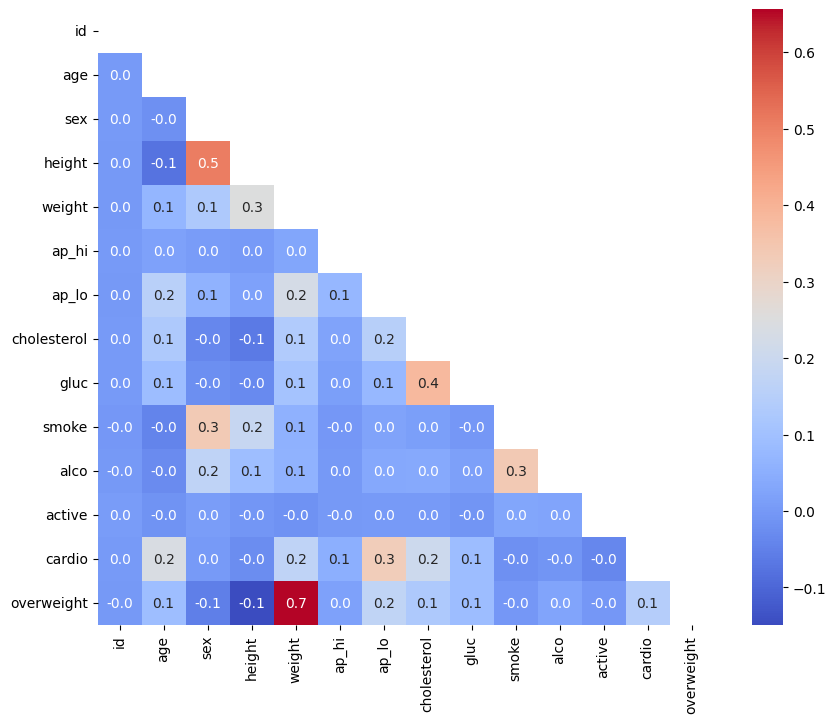

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', fmt=".1f", square=True, ax=ax)
print(fig,ax)
# Mostrar la figura
plt.show()